In [68]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import netCDF4
import glob

In [37]:
datapath = '/home/e2018136018/notebook/data2/'

In [60]:
f1 = netCDF4.Dataset(datapath + 'ei.moda.an.sfc.regn128sc.2000010100.nc')
f1.variables

{'CVL_GDS4_SFC_S123': <class 'netCDF4._netCDF4.Variable'>
 float32 CVL_GDS4_SFC_S123(g4_lat_0, g4_lon_1)
     N: 124
     statistical_process_duration: instantaneous (beginning at reference time at intervals of 6 hours)
     statistical_process_descriptor: average of N uninitialized analyses
     initial_time: 01/01/2000 (00:00)
     forecast_time_units: hours
     forecast_time: 0
     parameter_number: 27
     parameter_table_version: 128
     gds_grid_type: 4
     level_indicator: 1
     _FillValue: 1e+20
     units: (0 - 1)
     long_name: Low vegetation cover
     center: European Center for Medium-Range Weather Forecasts (RSMC)
 unlimited dimensions: 
 current shape = (256, 512)
 filling on,
 'CVH_GDS4_SFC_S123': <class 'netCDF4._netCDF4.Variable'>
 float32 CVH_GDS4_SFC_S123(g4_lat_0, g4_lon_1)
     N: 124
     statistical_process_duration: instantaneous (beginning at reference time at intervals of 6 hours)
     statistical_process_descriptor: average of N uninitialized analyses


In [67]:
f1.variables.keys()

dict_keys(['CVL_GDS4_SFC_S123', 'CVH_GDS4_SFC_S123', 'TVL_GDS4_SFC_S123', 'TVH_GDS4_SFC_S123', 'CI_GDS4_SFC_S123', 'ASN_GDS4_SFC_S123', 'RSN_GDS4_SFC_S123', 'SSTK_GDS4_SFC_S123', 'ISTL1_GDS4_DBLY_S123', 'ISTL2_GDS4_DBLY_S123', 'ISTL3_GDS4_DBLY_S123', 'ISTL4_GDS4_DBLY_S123', 'SWVL1_GDS4_DBLY_S123', 'SWVL2_GDS4_DBLY_S123', 'SWVL3_GDS4_DBLY_S123', 'SWVL4_GDS4_DBLY_S123', 'SDFOR_GDS4_SFC_S123', 'Z_GDS4_SFC_S123', 'SP_GDS4_SFC_S123', 'TCW_GDS4_SFC_S123', 'TCWV_GDS4_SFC_S123', 'STL1_GDS4_DBLY_S123', 'SD_GDS4_SFC_S123', 'CHNK_GDS4_SFC_S123', 'MSL_GDS4_SFC_S123', 'SDOR_GDS4_SFC_S123', 'ISOR_GDS4_SFC_S123', 'ANOR_GDS4_SFC_S123', 'SLOR_GDS4_SFC_S123', 'TCC_GDS4_SFC_S123', '10U_GDS4_SFC_S123', '10V_GDS4_SFC_S123', '2T_GDS4_SFC_S123', '2D_GDS4_SFC_S123', 'STL2_GDS4_DBLY_S123', 'LSM_GDS4_SFC_S123', 'SR_GDS4_SFC_S123', 'AL_GDS4_SFC_S123', 'STL3_GDS4_DBLY_S123', 'LCC_GDS4_SFC_S123', 'MCC_GDS4_SFC_S123', 'HCC_GDS4_SFC_S123', 'SRC_GDS4_SFC_S123', 'TCO3_GDS4_SFC_S123', '10SI_GDS4_SFC_S123', 'LSRH_GDS4_S

In [61]:
lats = f1.variables['g4_lat_0'][:]
lons = f1.variables['g4_lon_1'][:]

seoul_lat = np.abs(lats - 37.57).argmin() #서울에서 가장 가까운 지점 찾기
seoul_lon = np.abs(lons - 126.98).argmin()

In [62]:
files = glob.glob(datapath+'*.nc') #nc 파일 다 불러오기
dataset = np.zeros(len(files), dtype=np.float32)

In [63]:
idx = 0
for i in files:
    f_data = netCDF4.Dataset(i,'r')
    dataset[idx] = f_data.variables['2T_GDS4_SFC_S123'][seoul_lat,seoul_lon]
    idx += 1 #서울의 온도 데이터만 모으기

In [64]:
dataset.shape #모양 확인

(236,)

In [70]:
date = pd.date_range('20000101','20190801',freq='MS')
date #날짜자료 만들어줌

DatetimeIndex(['2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01',
               '2000-05-01', '2000-06-01', '2000-07-01', '2000-08-01',
               '2000-09-01', '2000-10-01',
               ...
               '2018-11-01', '2018-12-01', '2019-01-01', '2019-02-01',
               '2019-03-01', '2019-04-01', '2019-05-01', '2019-06-01',
               '2019-07-01', '2019-08-01'],
              dtype='datetime64[ns]', length=236, freq='MS')

In [76]:
Seoul = pd.DataFrame(data = dataset-273.15, index = date, columns=['Temperature(℃)'])
Seoul #날짜를 index로 data는 섭씨온도니까 273.15를 뺌

,Temperature(℃)
2000-01-01,-2.662231
2000-02-01,-2.249786
2000-03-01,5.050201
2000-04-01,10.810516
2000-05-01,16.761139
...,...
2019-04-01,11.474457
2019-05-01,18.838104
2019-06-01,21.747650
2019-07-01,25.059601


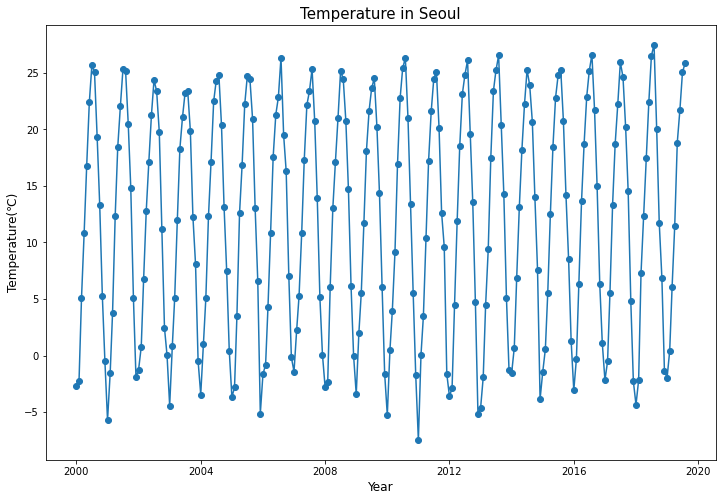

In [88]:
plt.figure(figsize=(12,8))
plt.plot(Seoul, marker='o')
plt.xlabel('Year', fontsize=12) ; plt.ylabel('Temperature(℃)', fontsize=12)
plt.title('Temperature in Seoul', fontsize=15)
plt.show()

In [89]:
Seoul.groupby(Seoul.index.month).mean()
#월평균 온도는 월로 묶고 평균

,Temperature(℃)
1,-3.302303
2,-0.424498
3,5.208481
4,11.831064
5,17.747883
6,22.147991
7,24.763754
8,25.239529
9,20.338251
10,13.705005


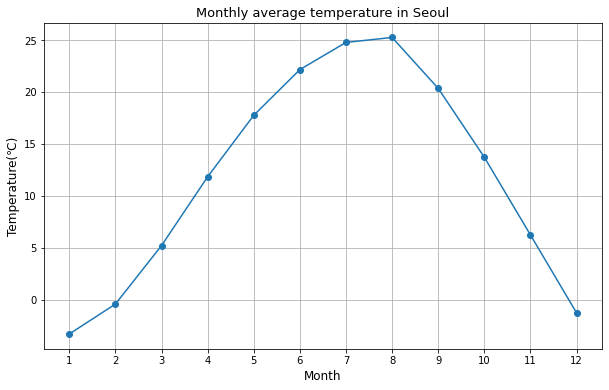

In [104]:
plt.figure(figsize=(10,6))
plt.plot(Seoul.groupby(Seoul.index.month).mean(), marker='o')
plt.grid()
plt.xlabel('Month' ,fontsize=12) ; plt.ylabel('Temperature(℃)' ,fontsize=12)
plt.xticks(np.arange(1,13,1))
plt.title('Monthly average temperature in Seoul', fontsize=13)
plt.show()